<a href="https://colab.research.google.com/github/rijinbaby/Urban-Sound-Classification/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
# Kaggle API to download the dataset
import os
kaggle_api = {"username":"rijinbaby","key":"68ba3de7c10ed5572f3483edad2db17f"}
os.environ['KAGGLE_USERNAME'] = kaggle_api['username']
os.environ['KAGGLE_KEY'] = kaggle_api['key']

In [3]:
# Kaggle authentication and download
import kaggle
kaggle.api.authenticate()
!  kaggle datasets download chrisfilo/urbansound8k

100% 5.61G/5.61G [01:24<00:00, 121MB/s]
100% 5.61G/5.61G [01:24<00:00, 71.5MB/s]


In [4]:
! unzip urbansound8k.zip

Streaming output truncated to the last 5000 lines.
  inflating: fold4/151877-5-1-0.wav  
  inflating: fold4/154758-5-0-0.wav  
  inflating: fold4/154758-5-0-1.wav  
  inflating: fold4/154758-5-0-10.wav  
  inflating: fold4/154758-5-0-11.wav  
  inflating: fold4/154758-5-0-12.wav  
  inflating: fold4/154758-5-0-13.wav  
  inflating: fold4/154758-5-0-14.wav  
  inflating: fold4/154758-5-0-15.wav  
  inflating: fold4/154758-5-0-16.wav  
  inflating: fold4/154758-5-0-17.wav  
  inflating: fold4/154758-5-0-18.wav  
  inflating: fold4/154758-5-0-19.wav  
  inflating: fold4/154758-5-0-2.wav  
  inflating: fold4/154758-5-0-20.wav  
  inflating: fold4/154758-5-0-21.wav  
  inflating: fold4/154758-5-0-3.wav  
  inflating: fold4/154758-5-0-4.wav  
  inflating: fold4/154758-5-0-5.wav  
  inflating: fold4/154758-5-0-6.wav  
  inflating: fold4/154758-5-0-7.wav  
  inflating: fold4/154758-5-0-8.wav  
  inflating: fold4/154758-5-0-9.wav  
  inflating: fold4/155320-3-0-0.wav  
  inflating: fold4/156362

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

#library for dealing with audio files
from librosa import display
import librosa
import IPython.display as ipd

In [6]:
#forming a panda dataframe from the metadata file
US = pd.read_csv("UrbanSound8K.csv")
print(US.shape)
US.head(20)

(8732, 8)


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


# Exploratory Data Analysis

In [ ]:
ipd.Audio('/content/fold1/101415-3-0-2.wav')

In [7]:
dog_bark, sampling_rate = librosa.load('/content/fold1/101415-3-0-2.wav')
dog_bark

array([-0.00011783, -0.00017157, -0.00017749, ..., -0.04598654,
       -0.04624664, -0.05089863], dtype=float32)

In [ ]:
sampling_rate

22050

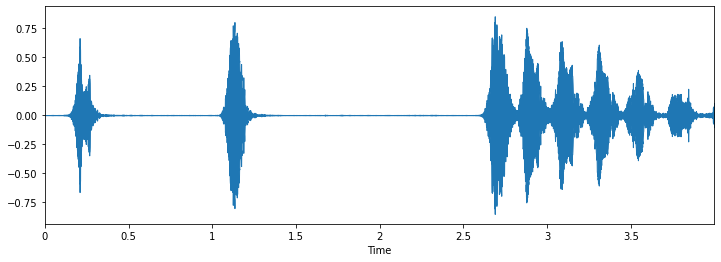

In [8]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(dog_bark, sr=sampling_rate)

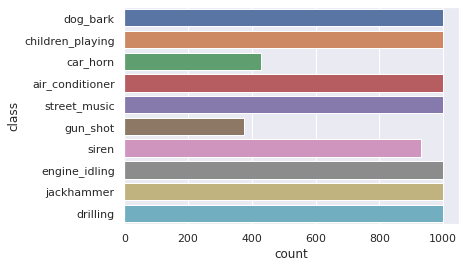

In [ ]:
import seaborn as sns
# sns.set_theme(style="darkgrid")
# sound_type = pd.DataFrame(data=data, columns=["class"])
ax = sns.countplot(y="class", data=US)

In [10]:
mfccs = librosa.feature.mfcc(dog_bark, sampling_rate)
mel =librosa.feature.melspectrogram(dog_bark, sampling_rate)
chroma_stft=librosa.feature.chroma_stft(dog_bark, sampling_rate,)
chroma_cens=librosa.feature.chroma_cens(dog_bark, sampling_rate,)

#       chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
#       chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
#       rmse = librosa.feature.rms(y=y)    
#       zcr = librosa.feature.zero_crossing_rate(y=y)
#       mel = librosa.feature.melspectrogram(y=y, sr=sr)
#       cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#       rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
#       spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
#       contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
#       flatness = librosa.feature.spectral_flatness(y=y)
#       mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

mfccs.shape, mel.shape, chroma_stft.shape

((20, 173), (128, 173), (12, 173))

Text(0.5, 1.0, 'MFCC')

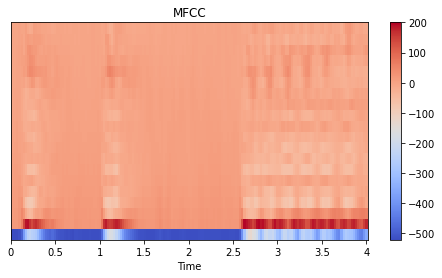

In [13]:
plt.figure(figsize=(8,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

Text(0.5, 1.0, 'chroma_stft')

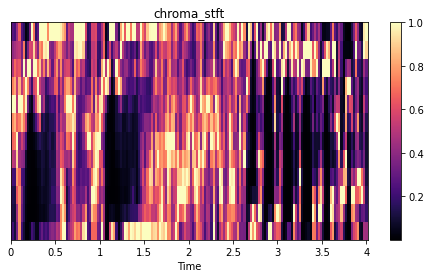

In [12]:
plt.figure(figsize=(8,4))
librosa.display.specshow(chroma_stft, x_axis='time')
plt.colorbar()
plt.title('chroma_stft')

Text(0.5, 1.0, 'chroma_cens')

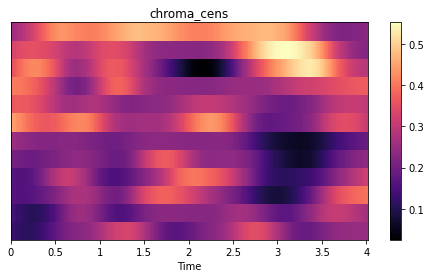

In [14]:
plt.figure(figsize=(8,4))
librosa.display.specshow(chroma_cens, x_axis='time')
plt.colorbar()
plt.title('chroma_cens')

Text(0.5, 1.0, 'mel')

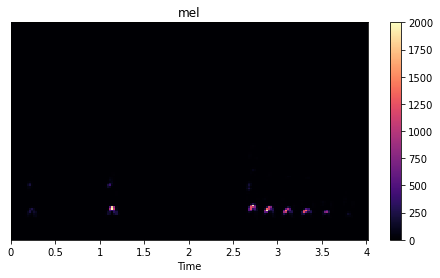

In [15]:
plt.figure(figsize=(8,4))
librosa.display.specshow(mel, x_axis='time')
plt.colorbar()
plt.title('mel')

## **Data Augmentation**

In [ ]:
# Data Augmentation
# Adding white noise

def noise(data):
    """
    Adding white noise.
    """
    
    noise_amp = 0.05*np.random.uniform()*np.amax(data) #reduce the value to 0.5 to add more noise
    data = data.astype('float64')+noise_amp*np.random.normal(size=data.shape[0])
    return data

#Adding shift
def shift(data):
    """
    Random phase shifting of the data.
    """
    s_range = int(np.random.uniform(low=-5, high=5)*1000) #default is 500
    return np.roll(data, s_range)

#Stretching the sound signal

def stretch(data, rate=0.8):
    """
    Stretches the sound. Also expands the dataset slightly.
    """
    
    data = librosa.effects.time_stretch(data, rate)
    return data

#pitch tunning

def pitch(data, sampling_rate):
    """
    Pitch Tunning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change = pitch_pm *2 *(np.random.uniform())
    data = librosa.effects.pitch_shift(data.astype('float64'),
                                                          sampling_rate, n_steps=pitch_change,
                                      bins_per_octave = bins_per_octave)
    return data


#Random value change
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=-0.5, high=7) #default is low=1.5, high=3
    return(data*dyn_change)


#Speed and Pitch Tunning

def speedNpitch(data):
    """
    Speed and Pitch tunning.
    """
    length_change = np.random.uniform(low=0.8, high=1)
    speed_fac = 1.2/length_change
    tmp = np.interp(np.arange(0,len(data), speed_fac), np.arange(0, len(data)), data)
    minlen = min(data.shape[0], tmp.shape[0])
    data*=0
    data[0:minlen] =tmp[0:minlen]
    return data
    


In [ ]:
import csv
#Preparing our .csv file, where the extracted features will be stored
header = 'fold_no label chroma_stft chroma_cens rmse zcr mel cent rolloff spec_bw contrast flatness' #chroma_cq
for i in range(0,40):
    header +=f' mfcc{i}'
header = header.split()

#getting mfcc featires of the enrire data set
file = open('usc.csv', 'w', newline='')
noise_d = open('usc_noise.csv','w',newline='')
pitch_d = open('usc_pitch.csv','w', newline='')
stretch_d = open('usc_stretch.csv','w', newline='')
shift_d =  open('usc_shift.csv','w',newline='')
with file:
  writer = csv.writer(file)
  writer.writerow(header)
with noise_d:
    writer = csv.writer(noise_d)
    writer.writerow(header)
with pitch_d:
    writer = csv.writer(pitch_d)
    writer.writerow(header)
with stretch_d:
    writer = csv.writer(stretch_d)
    writer.writerow(header)
with shift_d:
    writer = csv.writer(shift_d)
    writer.writerow(header)

In [ ]:
#preprocessing using entire feature set
# path="../data/UrbanSound8K/audio/fold"
path="/content/fold"
   
for i in tqdm(range(len(data))):
      
      fold_no=str(data.iloc[i]["fold"])
      file=data.iloc[i]["slice_file_name"]
      label=data.iloc[i]["classID"]
      filename=path+fold_no+"/"+file
      y,sr=librosa.load(filename)
  
      chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
      chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
      rmse = librosa.feature.rms(y=y)    
      zcr = librosa.feature.zero_crossing_rate(y=y)
      mel = librosa.feature.melspectrogram(y=y, sr=sr)
      cent = librosa.feature.spectral_centroid(y=y, sr=sr)
      rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
      spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
      contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
      flatness = librosa.feature.spectral_flatness(y=y)
      mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
      to_append = f'{fold_no} {label} {np.mean(chroma_stft)} {np.mean(chroma_cens)} {np.mean(rmse)} {np.mean(zcr)} {np.mean(mel)} {np.mean(cent)} {np.mean(rolloff)} {np.mean(spec_bw)} {np.mean(contrast)} {np.mean(flatness)}'
      for a in mfcc:
            to_append += f' {np.mean(a)}'
      file = open('usc.csv', 'a', newline='')
      with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
#####################noise##############################
      noise_aug = noise(y)
      noise_chroma_stft = librosa.feature.chroma_stft(y=noise_aug, sr=sr)
      noise_chroma_cens = librosa.feature.chroma_cens(y=noise_aug, sr=sr)
      noise_rmse = librosa.feature.rms(y=noise_aug)
      noise_zcr = librosa.feature.zero_crossing_rate(y=noise_aug)
      noise_cent = librosa.feature.spectral_centroid(y=noise_aug, sr=sr)
      noise_rolloff = librosa.feature.spectral_rolloff(y=noise_aug, sr=sr)
      noise_spec_bw = librosa.feature.spectral_bandwidth(y=noise_aug, sr=sr)
      noise_contrast = librosa.feature.spectral_contrast(y=noise_aug, sr=sr)
      noise_flatness = librosa.feature.spectral_flatness(y=noise_aug)
      noise_mel = librosa.feature.melspectrogram(y=noise_aug, sr=sr)
      noise_mfcc = librosa.feature.mfcc(y=noise_aug, sr=sr, n_mfcc=40)
      noise_to_append = f'{fold_no} {label} {np.mean(noise_chroma_stft)} {np.mean(noise_chroma_cens)} {np.mean(noise_rmse)} {np.mean(noise_zcr)} {np.mean(noise_mel)} {np.mean(noise_cent)} {np.mean(noise_rolloff)} {np.mean(noise_spec_bw)} {np.mean(noise_contrast)} {np.mean(noise_flatness)}'
      for a in noise_mfcc:
            noise_to_append += f' {np.mean(a)}'
      noise_d = open('usc_noise.csv', 'a', newline='')
      with noise_d:
            writer = csv.writer(noise_d)
            writer.writerow(noise_to_append.split())
  #####################pitch##############################
      pitch_aug = pitch(y,sampling_rate=sr)
      pitch_chroma_stft = librosa.feature.chroma_stft(y=pitch_aug, sr=sr)
      pitch_chroma_cens = librosa.feature.chroma_cens(y=pitch_aug, sr=sr)
      pitch_rmse = librosa.feature.rms(y=pitch_aug)
      pitch_zcr = librosa.feature.zero_crossing_rate(y=pitch_aug)
      pitch_cent = librosa.feature.spectral_centroid(y=pitch_aug, sr=sr)
      pitch_rolloff = librosa.feature.spectral_rolloff(y=pitch_aug, sr=sr)
      pitch_spec_bw = librosa.feature.spectral_bandwidth(y=pitch_aug, sr=sr)
      pitch_contrast = librosa.feature.spectral_contrast(y=pitch_aug, sr=sr)
      pitch_flatness = librosa.feature.spectral_flatness(y=pitch_aug)
      pitch_mel = librosa.feature.melspectrogram(y=pitch_aug, sr=sr)
      pitch_mfcc = librosa.feature.mfcc(y=pitch_aug, sr=sr, n_mfcc=40)
      pitch_to_append = f'{fold_no} {label} {np.mean(pitch_chroma_stft)} {np.mean(pitch_chroma_cens)} {np.mean(pitch_rmse)} {np.mean(pitch_zcr)} {np.mean(pitch_mel)} {np.mean(pitch_cent)} {np.mean(pitch_rolloff)} {np.mean(pitch_spec_bw)} {np.mean(pitch_contrast)} {np.mean(pitch_flatness)}'
      for a in pitch_mfcc:
            pitch_to_append += f' {np.mean(a)}'
      pitch_d = open('usc_pitch.csv', 'a', newline='')
      with pitch_d:
            writer = csv.writer(pitch_d)
            writer.writerow(pitch_to_append.split())
  #####################stretch############################
      stretch_aug = stretch(y)
      stretch_chroma_stft = librosa.feature.chroma_stft(y=stretch_aug, sr=sr)
      stretch_chroma_cens = librosa.feature.chroma_cens(y=stretch_aug, sr=sr)
      stretch_rmse = librosa.feature.rms(y=stretch_aug)
      stretch_zcr = librosa.feature.zero_crossing_rate(y=stretch_aug)
      stretch_cent = librosa.feature.spectral_centroid(y=stretch_aug, sr=sr)
      stretch_rolloff = librosa.feature.spectral_rolloff(y=stretch_aug, sr=sr)
      stretch_spec_bw = librosa.feature.spectral_bandwidth(y=stretch_aug, sr=sr)
      stretch_contrast = librosa.feature.spectral_contrast(y=stretch_aug, sr=sr)
      stretch_flatness = librosa.feature.spectral_flatness(y=stretch_aug)
      stretch_mel = librosa.feature.melspectrogram(y=stretch_aug, sr=sr)
      stretch_mfcc = librosa.feature.mfcc(y=stretch_aug, sr=sr, n_mfcc=40)
      stretch_to_append = f'{fold_no} {label} {np.mean(stretch_chroma_stft)} {np.mean(stretch_chroma_cens)} {np.mean(stretch_rmse)} {np.mean(stretch_zcr)} {np.mean(stretch_mel)} {np.mean(stretch_cent)} {np.mean(stretch_rolloff)} {np.mean(stretch_spec_bw)} {np.mean(stretch_contrast)} {np.mean(stretch_flatness)}'
      for a in stretch_mfcc:
            stretch_to_append += f' {np.mean(a)}'
      stretch_d = open('usc_stretch.csv', 'a', newline='')
      with stretch_d:
            writer = csv.writer(stretch_d)
            writer.writerow(stretch_to_append.split())
  #####################shift##############################
      shift_aug = shift(y)
      shift_chroma_stft = librosa.feature.chroma_stft(y=shift_aug, sr=sr)
      shift_chroma_cens = librosa.feature.chroma_cens(y=shift_aug, sr=sr)
      shift_rmse = librosa.feature.rms(y=shift_aug)
      shift_zcr = librosa.feature.zero_crossing_rate(y=shift_aug)
      shift_cent = librosa.feature.spectral_centroid(y=shift_aug, sr=sr)
      shift_rolloff = librosa.feature.spectral_rolloff(y=shift_aug, sr=sr)
      shift_spec_bw = librosa.feature.spectral_bandwidth(y=shift_aug, sr=sr)
      shift_contrast = librosa.feature.spectral_contrast(y=shift_aug, sr=sr)
      shift_flatness = librosa.feature.spectral_flatness(y=shift_aug)
      shift_mel = librosa.feature.melspectrogram(y=shift_aug, sr=sr)
      shift_mfcc = librosa.feature.mfcc(y=shift_aug, sr=sr, n_mfcc=40)
      shift_to_append = f'{fold_no} {label} {np.mean(shift_chroma_stft)} {np.mean(shift_chroma_cens)} {np.mean(shift_rmse)} {np.mean(shift_zcr)} {np.mean(shift_mel)} {np.mean(shift_cent)} {np.mean(shift_rolloff)} {np.mean(shift_spec_bw)} {np.mean(shift_contrast)} {np.mean(shift_flatness)}'
      for a in shift_mfcc:
            shift_to_append += f' {np.mean(a)}'
      shift_d = open('usc_shift.csv', 'a', newline='')
      with shift_d:
            writer = csv.writer(shift_d)
            writer.writerow(shift_to_append.split())

  0%|          | 0/8732 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=876
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=438
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=219
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=110
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=876
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=438
  n_fft, y.shape[-1]
/usr/local/l

In [ ]:
#usc.to_csv('usc_backup.csv', index=False)
noise = pd.read_csv('usc_noise.csv')
shift = pd.read_csv('usc_shift.csv')
stretch = pd.read_csv('usc_stretch.csv')
pitch = pd.read_csv('usc_pitch.csv')
usc = pd.read_csv('usc.csv')

usc_aug = pd.concat([usc, noise, shift, stretch, pitch], axis=0)

In [ ]:
usc.shape, noise.shape, pitch.shape, stretch.shape, shift.shape, usc_aug.shape

((8732, 52), (8732, 52), (8732, 52), (8732, 52), (8732, 52), (43660, 52))

In [ ]:
# 5050 split for train and test as per requirements, Only mfcc
X_train_5050_mfcc = usc_aug.loc[(usc_aug['fold_no']==1) | (usc_aug['fold_no']==2) | (usc_aug['fold_no']==3) | (usc_aug['fold_no']==4) | (usc_aug['fold_no']==6)][['mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
                                                                                                                                         'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
                                                                                                                                         'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20',
                                                                                                                                         'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27',
                                                                                                                                         'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34',
                                                                                                                                         'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39']]
y_train_5050_mfcc = usc_aug.loc[(usc_aug['fold_no']==1) | (usc_aug['fold_no']==2) | (usc_aug['fold_no']==3) | (usc_aug['fold_no']==4) | (usc_aug['fold_no']==6)]['label']

X_test_5050_mfcc = usc.loc[(usc['fold_no']==5) | (usc['fold_no']==7) | (usc['fold_no']==8) | (usc['fold_no']==9) | (usc['fold_no']==10)][['fold_no','mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
                                                                                                                                         'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
                                                                                                                                         'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20',
                                                                                                                                         'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27',
                                                                                                                                         'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34',
                                                                                                                                         'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39']]
y_test_5050_mfcc = usc.loc[(usc['fold_no']==5) | (usc['fold_no']==7) | (usc['fold_no']==8) | (usc['fold_no']==9) | (usc['fold_no']==10)][['label','fold_no']]
X_train_5050_mfcc.to_csv('X_train_5050_mfcc_aug.csv', index=False)
y_train_5050_mfcc.to_csv('y_train_5050_mfcc_aug.csv', index=False)
X_test_5050_mfcc.to_csv('X_test_5050_mfcc_aug.csv', index=False)
y_test_5050_mfcc.to_csv('y_test_5050_mfcc_aug.csv', index=False)
X_test_5050_mfcc.shape, y_test_5050_mfcc.shape, X_train_5050_mfcc.shape,y_train_5050_mfcc.shape


((4233, 41), (4233, 2), (22495, 40), (22495,))

In [ ]:
# 5050 split for train and test as per requirements, Only mfcc
X_train_5050_mfcc = usc.loc[(usc['fold_no']==1) | (usc['fold_no']==2) | (usc['fold_no']==3) | (usc['fold_no']==4) | (usc['fold_no']==6)][['mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
                                                                                                                                         'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
                                                                                                                                         'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20',
                                                                                                                                         'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27',
                                                                                                                                         'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34',
                                                                                                                                         'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39']]
y_train_5050_mfcc = usc.loc[(usc['fold_no']==1) | (usc['fold_no']==2) | (usc['fold_no']==3) | (usc['fold_no']==4) | (usc['fold_no']==6)]['label']

X_test_5050_mfcc = usc.loc[(usc['fold_no']==5) | (usc['fold_no']==7) | (usc['fold_no']==8) | (usc['fold_no']==9) | (usc['fold_no']==10)][['fold_no','mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
                                                                                                                                         'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
                                                                                                                                         'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20',
                                                                                                                                         'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27',
                                                                                                                                         'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34',
                                                                                                                                         'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39']]
y_test_5050_mfcc = usc.loc[(usc['fold_no']==5) | (usc['fold_no']==7) | (usc['fold_no']==8) | (usc['fold_no']==9) | (usc['fold_no']==10)][['label','fold_no']]
X_train_5050_mfcc.to_csv('X_train_5050_mfcc.csv', index=False)
y_train_5050_mfcc.to_csv('y_train_5050_mfcc.csv', index=False)
X_test_5050_mfcc.to_csv('X_test_5050_mfcc.csv', index=False)
y_test_5050_mfcc.to_csv('y_test_5050_mfcc.csv', index=False)
X_test_5050_mfcc.shape, y_test_5050_mfcc.shape, X_train_5050_mfcc.shape,y_train_5050_mfcc.shape


((4233, 41), (4233, 2), (4499, 40), (4499,))

In [ ]:
# 5050 split for train and test as per requirements, all features
X_train_5050_all = usc_aug.loc[(usc_aug['fold_no']==1) | (usc_aug['fold_no']==2) | (usc_aug['fold_no']==3) | (usc_aug['fold_no']==4) | (usc_aug['fold_no']==6)]
y_train_5050_all = usc_aug.loc[(usc_aug['fold_no']==1) | (usc_aug['fold_no']==2) | (usc_aug['fold_no']==3) | (usc_aug['fold_no']==4) | (usc_aug['fold_no']==6)]['label']

X_test_5050_all = usc.loc[(usc['fold_no']==5) | (usc['fold_no']==7) | (usc['fold_no']==8) | (usc['fold_no']==9) | (usc['fold_no']==10)]
y_test_5050_all = usc.loc[(usc['fold_no']==5) | (usc['fold_no']==7) | (usc['fold_no']==8) | (usc['fold_no']==9) | (usc['fold_no']==10)][['label','fold_no']]

X_train_5050_all.drop(['label', 'fold_no'], axis=1, inplace=True)
X_test_5050_all.drop(['label'], axis=1, inplace=True)

X_train_5050_all.to_csv('X_train_5050_all_aug.csv', index=False)
y_train_5050_all.to_csv('y_train_5050_all_aug.csv', index=False)
X_test_5050_all.to_csv('X_test_5050_all_aug.csv', index=False)
y_test_5050_all.to_csv('y_test_5050_all_aug.csv', index=False)
X_test_5050_all.shape, y_test_5050_all.shape, X_train_5050_all.shape,y_train_5050_all.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((4233, 51), (4233, 2), (22495, 50), (22495,))

In [ ]:
# 5050 split for train and test as per requirements, all features
X_train_5050_all = usc.loc[(usc['fold_no']==1) | (usc['fold_no']==2) | (usc['fold_no']==3) | (usc['fold_no']==4) | (usc['fold_no']==6)]
y_train_5050_all = usc.loc[(usc['fold_no']==1) | (usc['fold_no']==2) | (usc['fold_no']==3) | (usc['fold_no']==4) | (usc['fold_no']==6)]['label']

X_test_5050_all = usc.loc[(usc['fold_no']==5) | (usc['fold_no']==7) | (usc['fold_no']==8) | (usc['fold_no']==9) | (usc['fold_no']==10)]
y_test_5050_all = usc.loc[(usc['fold_no']==5) | (usc['fold_no']==7) | (usc['fold_no']==8) | (usc['fold_no']==9) | (usc['fold_no']==10)][['label','fold_no']]

X_train_5050_all.drop(['label', 'fold_no'], axis=1, inplace=True)
X_test_5050_all.drop(['label'], axis=1, inplace=True)

X_train_5050_all.to_csv('X_train_5050_all.csv', index=False)
y_train_5050_all.to_csv('y_train_5050_all.csv', index=False)
X_test_5050_all.to_csv('X_test_5050_all.csv', index=False)
y_test_5050_all.to_csv('y_test_5050_all.csv', index=False)
X_test_5050_all.shape, y_test_5050_all.shape, X_train_5050_all.shape,y_train_5050_all.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((4233, 51), (4233, 2), (4499, 50), (4499,))

In [ ]:
# 8020 split for train and test as per requirements, Only mfcc
X_train_8020_mfcc = usc_aug.loc[(usc_aug['fold_no']==1) | (usc_aug['fold_no']==2) | (usc_aug['fold_no']==3) | (usc_aug['fold_no']==4) | (usc_aug['fold_no']==5) | (usc_aug['fold_no']==6) | (usc_aug['fold_no']==7) | (usc_aug['fold_no']==8)][['mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
                                                                                                                                         'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
                                                                                                                                         'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20',
                                                                                                                                         'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27',
                                                                                                                                         'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34',
                                                                                                                                         'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39']]
y_train_8020_mfcc = usc_aug.loc[(usc_aug['fold_no']==1) | (usc_aug['fold_no']==2) | (usc_aug['fold_no']==3) | (usc_aug['fold_no']==4) | (usc_aug['fold_no']==5) | (usc_aug['fold_no']==6) | (usc_aug['fold_no']==7) | (usc_aug['fold_no']==8)]['label']

X_test_8020_mfcc = usc.loc[(usc['fold_no']==9) | (usc['fold_no']==10)][['fold_no','mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
                                                                        'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
                                                                        'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20',
                                                                        'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27',
                                                                        'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34',
                                                                        'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39']]
y_test_8020_mfcc = usc.loc[(usc['fold_no']==9) | (usc['fold_no']==10)][['label','fold_no']]
X_train_8020_mfcc.to_csv('X_train_8020_mfcc_aug.csv', index=False)
y_train_8020_mfcc.to_csv('y_train_8020_mfcc_aug.csv', index=False)
X_test_8020_mfcc.to_csv('X_test_8020_mfcc_aug.csv', index=False)
y_test_8020_mfcc.to_csv('y_test_8020_mfcc_aug.csv', index=False)
X_test_8020_mfcc.shape, y_test_8020_mfcc.shape, X_train_8020_mfcc.shape,y_train_8020_mfcc.shape

((1653, 41), (1653, 2), (35395, 40), (35395,))

In [ ]:
# 8020 split for train and test as per requirements, Only mfcc
X_train_8020_mfcc = usc.loc[(usc['fold_no']==1) | (usc['fold_no']==2) | (usc['fold_no']==3) | (usc['fold_no']==4) | (usc['fold_no']==5) | (usc['fold_no']==6) | (usc['fold_no']==7) | (usc['fold_no']==8)][['mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
                                                                                                                                         'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
                                                                                                                                         'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20',
                                                                                                                                         'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27',
                                                                                                                                         'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34',
                                                                                                                                         'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39']]
y_train_8020_mfcc = usc.loc[(usc['fold_no']==1) | (usc['fold_no']==2) | (usc['fold_no']==3) | (usc['fold_no']==4) | (usc['fold_no']==5) | (usc['fold_no']==6) | (usc['fold_no']==7) | (usc['fold_no']==8)]['label']

X_test_8020_mfcc = usc.loc[(usc['fold_no']==9) | (usc['fold_no']==10)][['fold_no','mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
                                                                        'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
                                                                        'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20',
                                                                        'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27',
                                                                        'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34',
                                                                        'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39']]
y_test_8020_mfcc = usc.loc[(usc['fold_no']==9) | (usc['fold_no']==10)][['label','fold_no']]
X_train_8020_mfcc.to_csv('X_train_8020_mfcc.csv', index=False)
y_train_8020_mfcc.to_csv('y_train_8020_mfcc.csv', index=False)
X_test_8020_mfcc.to_csv('X_test_8020_mfcc.csv', index=False)
y_test_8020_mfcc.to_csv('y_test_8020_mfcc.csv', index=False)
X_test_8020_mfcc.shape, y_test_8020_mfcc.shape, X_train_8020_mfcc.shape,y_train_8020_mfcc.shape

((1653, 41), (1653, 2), (7079, 40), (7079,))

In [ ]:
# 8020 split for train and test as per requirements, all features
X_train_8020_all = usc_aug.loc[(usc_aug['fold_no']==1) | (usc_aug['fold_no']==2) | (usc_aug['fold_no']==3) | (usc_aug['fold_no']==4) | (usc_aug['fold_no']==5) | (usc_aug['fold_no']==6) | (usc_aug['fold_no']==7) | (usc_aug['fold_no']==8)]
y_train_8020_all = usc_aug.loc[(usc_aug['fold_no']==1) | (usc_aug['fold_no']==2) | (usc_aug['fold_no']==3) | (usc_aug['fold_no']==4) | (usc_aug['fold_no']==5) | (usc_aug['fold_no']==6) | (usc_aug['fold_no']==7) | (usc_aug['fold_no']==8)]['label']

X_test_8020_all = usc.loc[(usc['fold_no']==9) | (usc['fold_no']==10)]
y_test_8020_all = usc.loc[(usc['fold_no']==9) | (usc['fold_no']==10)][['label','fold_no']]

X_train_8020_all.drop(['label', 'fold_no'], axis=1, inplace=True)
X_test_8020_all.drop(['label'], axis=1, inplace=True)

X_train_8020_all.to_csv('X_train_8020_all_aug.csv', index=False)
y_train_8020_all.to_csv('y_train_8020_all_aug.csv', index=False)
X_test_8020_all.to_csv('X_test_8020_all_aug.csv', index=False)
y_test_8020_all.to_csv('y_test_8020_all_aug.csv', index=False)

X_test_8020_all.shape, y_test_8020_all.shape, X_train_8020_all.shape,y_train_8020_all.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((1653, 51), (1653, 2), (35395, 50), (35395,))

In [ ]:
# 8020 split for train and test as per requirements, all features
X_train_8020_all = usc.loc[(usc['fold_no']==1) | (usc['fold_no']==2) | (usc['fold_no']==3) | (usc['fold_no']==4) | (usc['fold_no']==5) | (usc['fold_no']==6) | (usc['fold_no']==7) | (usc['fold_no']==8)]
y_train_8020_all = usc.loc[(usc['fold_no']==1) | (usc['fold_no']==2) | (usc['fold_no']==3) | (usc['fold_no']==4) | (usc['fold_no']==5) | (usc['fold_no']==6) | (usc['fold_no']==7) | (usc['fold_no']==8)]['label']

X_test_8020_all = usc.loc[(usc['fold_no']==9) | (usc['fold_no']==10)]
y_test_8020_all = usc.loc[(usc['fold_no']==9) | (usc['fold_no']==10)][['label','fold_no']]

X_train_8020_all.drop(['label', 'fold_no'], axis=1, inplace=True)
X_test_8020_all.drop(['label'], axis=1, inplace=True)

X_train_8020_all.to_csv('X_train_8020_all.csv', index=False)
y_train_8020_all.to_csv('y_train_8020_all.csv', index=False)
X_test_8020_all.to_csv('X_test_8020_all.csv', index=False)
y_test_8020_all.to_csv('y_test_8020_all.csv', index=False)

X_test_8020_all.shape, y_test_8020_all.shape, X_train_8020_all.shape,y_train_8020_all.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((1653, 51), (1653, 2), (7079, 50), (7079,))